In [1]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from matplotlib import animation

In [3]:
def find_evals(V0, lam, x_max=20, N=1000):
    """
    Find eigenvalues (and eigenvectors) of 1D Schrodinger equation for a Gaussian potential well. 

    Parameters:
        V0: Depth of well
        lam: Width of well
        x_max: boundary of domain
        N: number of grid points

    Returns:
        evals: Eigenenergies
        evecs: Corresponding wavefunctions
    """
    x = np.linspace(-x_max, x_max, N)
    dx = x[1] - x[0]
    V = -V0 * np.exp(-lam * x**2) # Gaussian potential
    H_diag = np.ones(N) / dx**2 + V
    H_offdiag = -np.ones(N-1)/(2 * dx**2)
    H = np.diag(H_diag) + np.diag(H_offdiag, k=1) + np.diag(H_offdiag, k=-1) # Hamiltonian matrix
    evals, evecs = eigh(H)
    return evals, evecs

In [5]:
# Find parameters for the Gaussian potential that admit bound states (eval < 0)
V0_values = np.linspace(-5, 5, 4)
lam_values = np.linspace(0.1, 1, 2)
params = []
for V0 in V0_values:
    for lam in lam_values:
        evals = find_evals(V0, lam)[0]
        if np.any(evals < 0):
            params.append((V0, lam))
print(params)
print(len(params))
    

[(1.666666666666667, 0.1), (1.666666666666667, 1.0), (5.0, 0.1), (5.0, 1.0)]
4


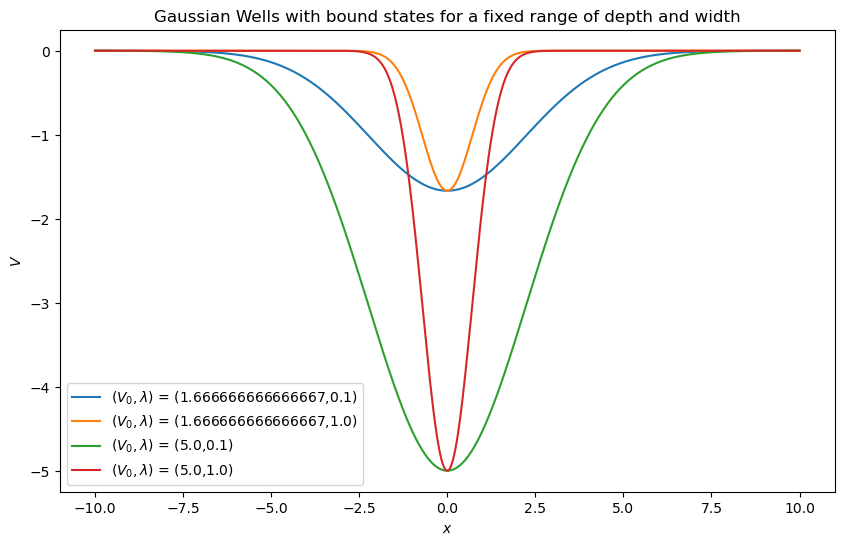

In [15]:
plt.figure(figsize = (10, 6))
for param in params:
    V0 = param[0]
    lam = param[1]
    x = np.linspace(-10, 10, 1000)
    V = -V0 * np.exp(-lam * x**2)
    plt.plot(x, V, label=fr"$(V_0, \lambda)$ = ({V0},{lam})")
plt.title("Gaussian Wells with bound states for a fixed range of depth and width")
plt.xlabel(r"$x$")
plt.ylabel(r"$V$")
plt.legend()

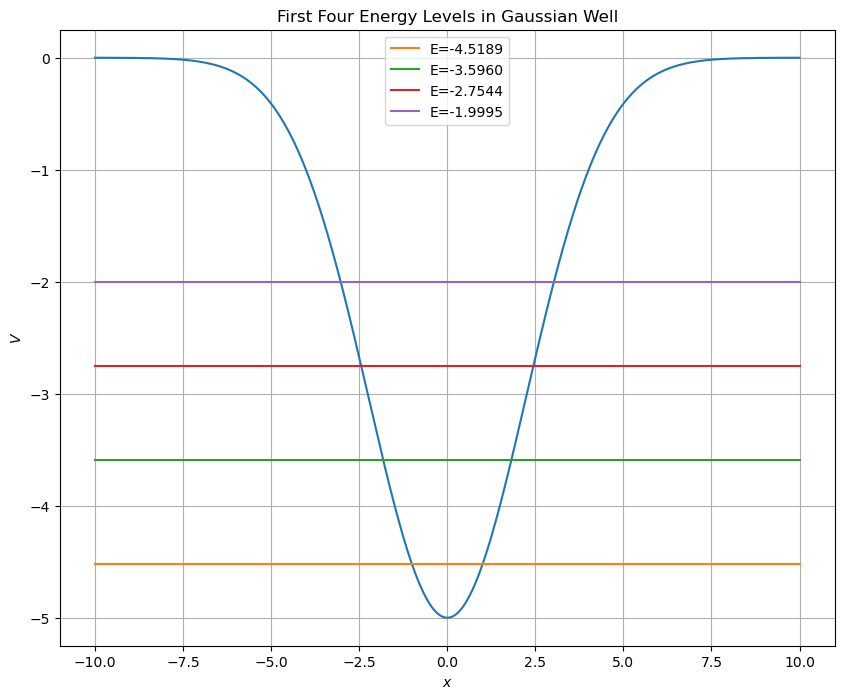

In [19]:
plt.figure(figsize=(10, 8))
V0, lam = 5.0, 0.1
x = np.linspace(-10, 10, 1000)
V = -V0 * np.exp(-lam * x**2)
plt.plot(x, V)
evals = find_evals(V0, lam)[0][0:4]

i = -1
for eval in evals:
    i += 1
    if eval < 0:
        y = [eval for x_values in x]
        plt.plot(x, y, label=f"E={eval:.4f}")       
plt.legend()
plt.title("First Four Energy Levels in Gaussian Well")
plt.xlabel(r"$x$")
plt.ylabel(r"$V$")
plt.grid(True)

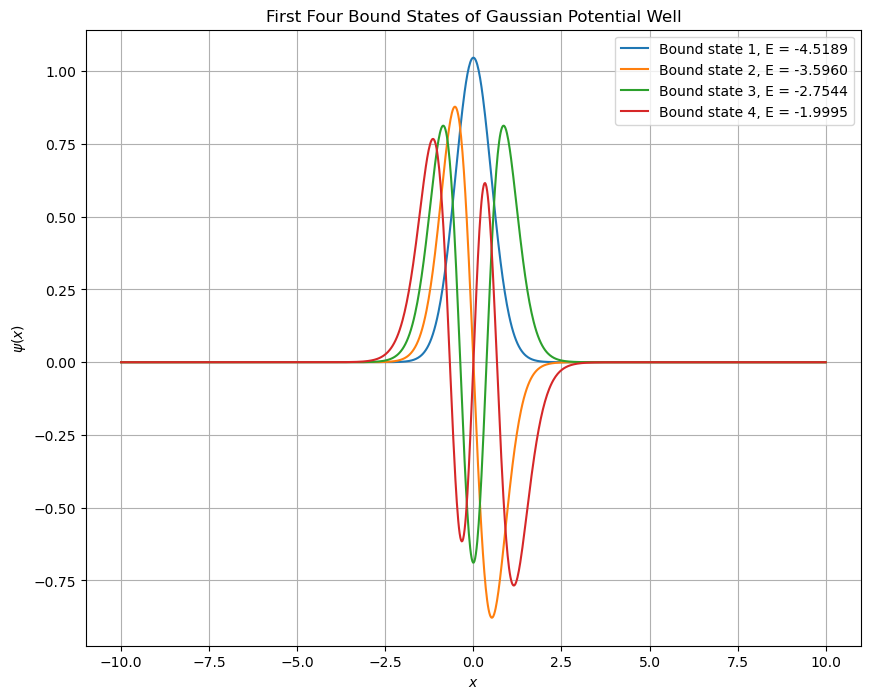

In [21]:
plt.figure(figsize=(10, 8))
i = -1
evecs = find_evals(V0, lam)[1]
for eval in evals:
    i += 1
    if eval < 0:
        y = evecs[:,i] / np.sqrt(np.trapz(np.abs(evecs[i])**2, x)) # normalise
        plt.plot(x, y, label=f"Bound state {i+1}, E = {eval:.4f}")
plt.title('First Four Bound States of Gaussian Potential Well')
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(x)$')
plt.legend()
plt.grid(True)